In [1]:
using Plots; pyplot()
using StatPlots
using DataFrames

import CSV
import Glob
import DataStructures: counter

  likely near In[1]:6
  likely near In[1]:6


In [2]:
include("src/trajectories.jl")

sp_sub2ind (generic function with 1 method)

In [3]:
traj_folders = Glob.glob("data/i*")

7-element Array{String,1}:
 "data\\i101_trajectories-0750am-0805am"    
 "data\\i101_trajectories-0750am-0805am_old"
 "data\\i101_trajectories-0805am-0820am"    
 "data\\i101_trajectories-0820am-0835am"    
 "data\\i80_trajectories-0400-0415"         
 "data\\i80_trajectories-0500-0515"         
 "data\\i80_trajectories-0515-0530"         

In [4]:
data_path = traj_folders[1]
# JLD2.@load joinpath(data_path, "td.jld") td
# (S, id_lookup) = td_sparse(td);

X = CSV.read(joinpath(data_path, "X.csv"), nullable=false)
(pairs, _) = readcsv(joinpath(data_path, "pairs.csv"), Int, header=true)
pairs = pairs'
trajptr = readcsv(joinpath(data_path, "traj_ptr.csv"), Int) |> vec
;


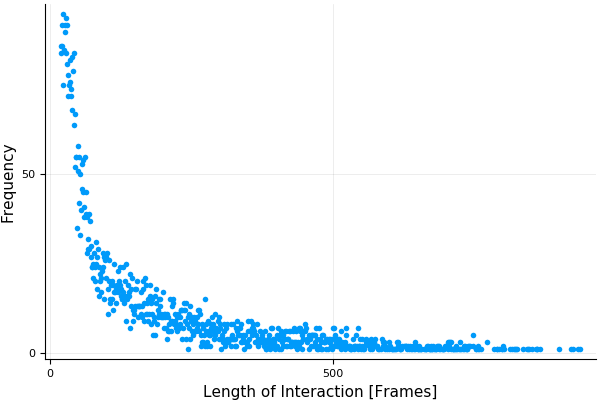

In [5]:
pairlens = vec(diff(pairs[1:2, :]))

len_counts = counter(pairlens)
lens = collect(keys(len_counts))
counts = collect(values(len_counts))

# plot(pairlens, seriestype=:density)
scatter(lens, counts, marker=stroke(0), legend=false)
xlabel!("Length of Interaction [Frames]")
ylabel!("Frequency")


## Velocities of (Supposedly) Interacting Cars


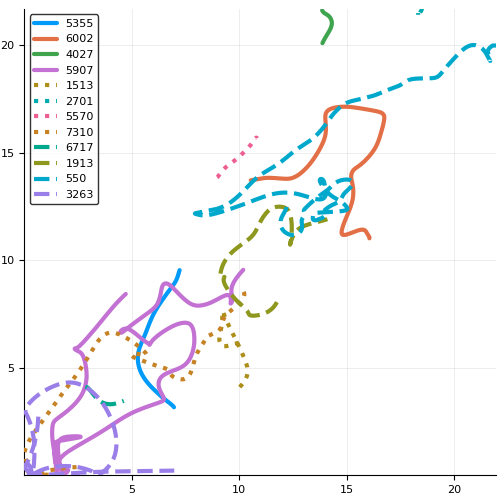

In [6]:
N = 4
styles = repeat([:solid, :dot, :dash], inner=N)

plot(size=(500, 500), aspectratio=:equal)
for (i, id) in rand(1:size(pairs, 2), N*3) |> enumerate
    r1, r2 = get_pair_ranges(pairs, id)

    plot!(X[r1, :velocity], X[r2, :velocity], line=(3, styles[i]), label=id)
end
plot!()

## Velocities of Random Cars


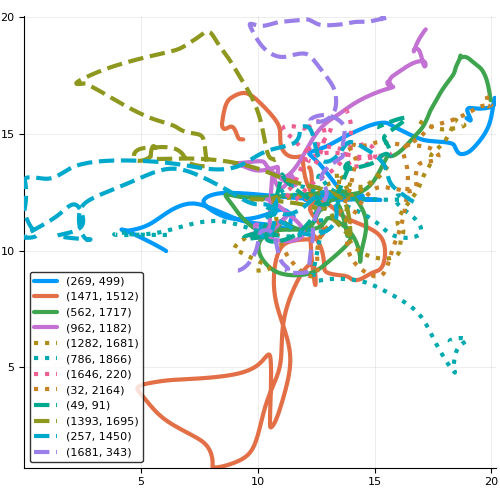

In [7]:
num_trajs = length(trajptr) - 1
idxs_i = rand(1:num_trajs, length(styles))
idxs_j = rand(1:num_trajs, length(styles))

plot(size=(500, 500), aspectratio=:equal)
for (k, (i, j)) in zip(idxs_i, idxs_j) |> enumerate
    r1 = get_trajectory_range(trajptr, i)
    r2 = get_trajectory_range(trajptr, j)
    
    T = minimum(map(length, [r1, r2]))
    r1 = start(r1) + (0:(T-1))
    r2 = start(r2) + (0:(T-1))

    plot!(X[r1, :velocity], X[r2, :velocity], line=(3, styles[k]), label=(i, j))
end
plot!()

### Plot Max Length Pairwise Trajectory


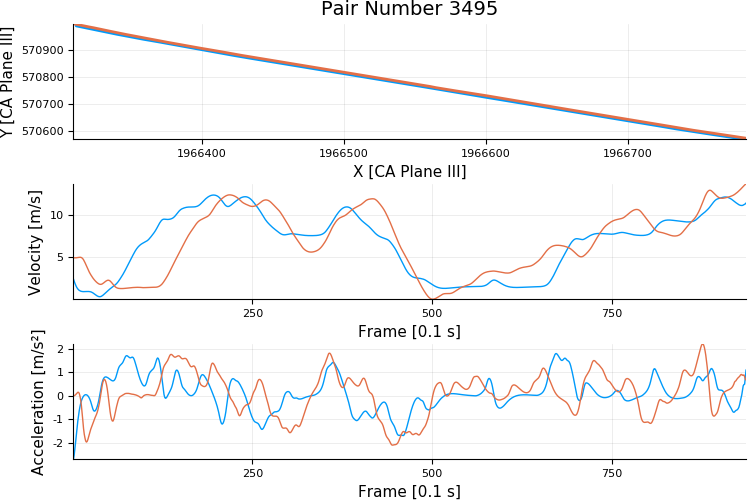

In [8]:
ind = indmax(pairlens)
r1, r2 = get_pair_ranges(pairs, ind)

plot(
    plot([X[r1, :x] X[r2, :x]], [X[r1, :y], X[r2, :y]], 
        title="Pair Number $(ind)", xlabel="X [CA Plane III]", ylabel="Y [CA Plane III]", line=2),
#     plot([X[r1, :heading], X[r2, :heading]], xlabel="Frame [0.1 s]", ylabel="Heading [rad]"),
    plot([X[r1, :velocity], X[r2, :velocity]], xlabel="Frame [0.1 s]", ylabel="Velocity [m/s]"),
    plot([X[r1, :acceleration], X[r2, :acceleration]], xlabel="Frame [0.1 s]", ylabel="Acceleration [m/s²]"),
    layout=(3, 1), size=(750, 500), legend=false)

### Plot Random Pairwise Trajectory


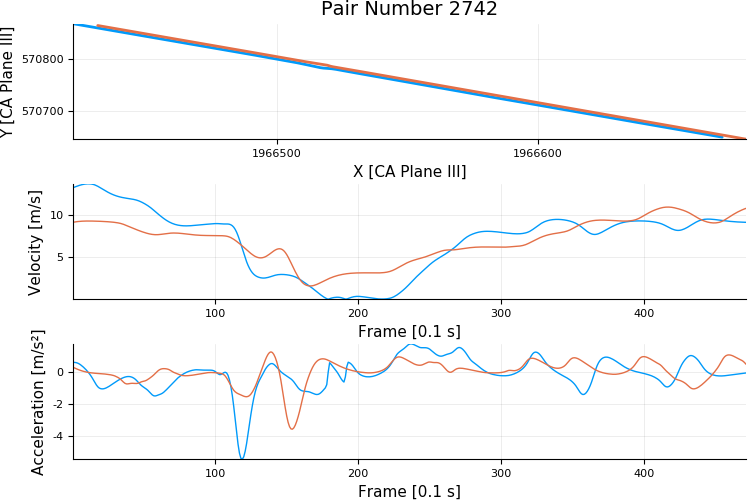

In [9]:
ind = rand(find(pairlens .> 400))
r1, r2 = get_pair_ranges(pairs, ind)

plot(
    plot([X[r1, :x] X[r2, :x]], [X[r1, :y], X[r2, :y]], 
        title="Pair Number $(ind)", xlabel="X [CA Plane III]", ylabel="Y [CA Plane III]", line=2),
#     plot([X[r1, :heading], X[r2, :heading]], xlabel="Frame [0.1 s]", ylabel="Heading [rad]"),
    plot([X[r1, :velocity], X[r2, :velocity]], xlabel="Frame [0.1 s]", ylabel="Velocity [m/s]"),
    plot([X[r1, :acceleration], X[r2, :acceleration]], xlabel="Frame [0.1 s]", ylabel="Acceleration [m/s²]"),
    layout=(3, 1), size=(750, 500), legend=false)

### Correlations


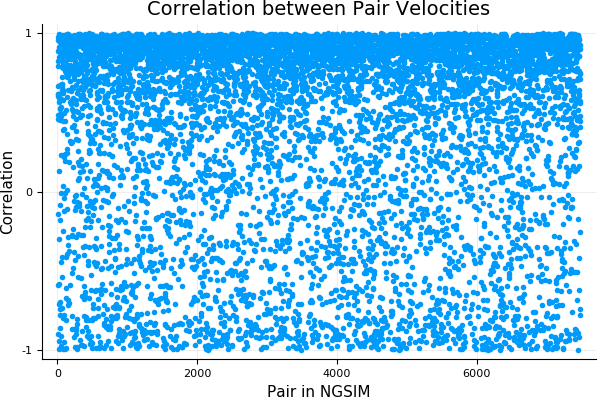

In [10]:
num_pairs = size(pairs, 2)
corrs = zeros(num_pairs)

V = X[:velocity]
for id in 1:num_pairs
    V = X[:velocity]
    r1, r2 = get_pair_ranges(pairs, id)
    corrs[id] = cor(V[r1], V[r2])
end

scatter(corrs, marker=stroke(0), 
    xlabel="Pair in NGSIM", ylabel="Correlation", 
    title="Correlation between Pair Velocities", legend=false)
# savefig(joinpath(data_path, "corrs.png"))